In [16]:
import pandas as pd
loan_data = pd.read_csv("loan_data.csv")
loan_data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


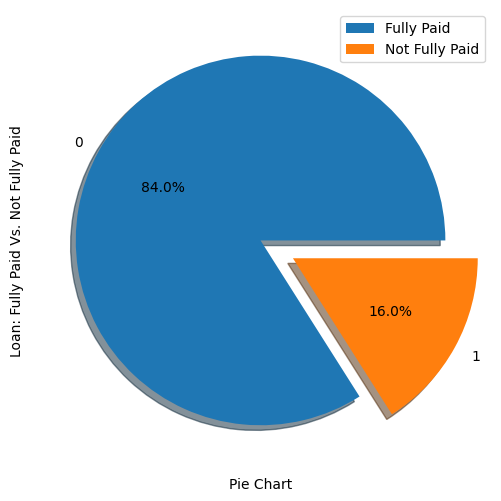

In [20]:
import matplotlib.pyplot as plt

def show_loan_distrib(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["not.fully.paid"].value_counts()
  else:
      count = data.value_counts()

  count.plot(kind = 'pie', explode = [0, 0.2], 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
  plt.xlabel("Pie Chart")
  plt.legend(["Fully Paid", "Not Fully Paid"])
  plt.show()


show_loan_distrib(loan_data)

In [21]:
print(loan_data.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [23]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose",   drop_first=True)
print(encoded_loan_data.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card              bool
purpose_debt_consolidation       bool
purpose_educational              bool
purpose_home_improvement         bool
purpose_major_purchase           bool
purpose_small_business           bool
dtype: object


In [29]:
from sklearn.model_selection import train_test_split

X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state=2022)

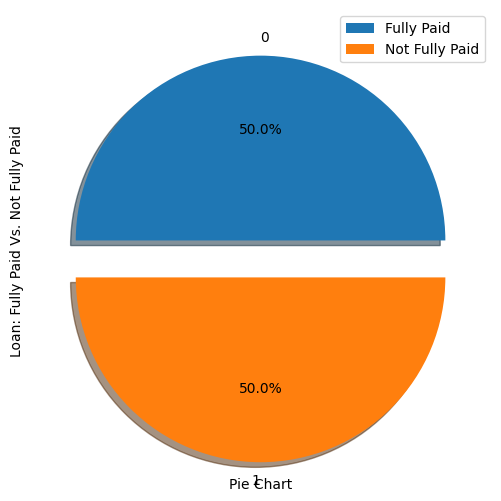

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)
# Visualize the proportion of borrowers
show_loan_distrib(y_train_SMOTE)

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)

y_pred = svc_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2414
           1       0.37      0.05      0.09       460

    accuracy                           0.83      2874
   macro avg       0.61      0.52      0.50      2874
weighted avg       0.77      0.83      0.78      2874



In [51]:
svc_accuracy = accuracy_score(y_test, y_pred)
print("SVC Accuracy:", svc_accuracy)

SVC Accuracy: 0.8343771746694503


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("-----------------------------------------------")
print(classification_report(y_test,rf_predictions))

Random Forest Classifier Accuracy: 0.8395963813500348
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.47      0.02      0.03       460

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.47      2874
weighted avg       0.78      0.84      0.77      2874

